In [ ]:
!pip install -U tensorflow-addons

Requirement already up-to-date: tensorflow-addons in /usr/local/lib/python3.6/dist-packages (0.12.0)


In [ ]:
!git clone https://github.com/Lukasz-sj/vit_keras

Cloning into 'vit_keras'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 76 (delta 37), reused 57 (delta 21), pack-reused 0
Unpacking objects: 100% (76/76), done.


In [ ]:
!gsutil cp gs://vit_models/imagenet21k+imagenet2012/ViT-B_16.npz ViT-B_16_imagenet2012.npz

Copying gs://vit_models/imagenet21k+imagenet2012/ViT-B_16.npz...
| [1 files][331.4 MiB/331.4 MiB]                                                
Operation completed over 1 objects/331.4 MiB.                                    


In [ ]:
!wget https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
imagenet_labels = dict(enumerate(open('ilsvrc2012_wordnet_lemmas.txt')))

--2020-12-28 17:58:46--  https://storage.googleapis.com/bit_models/ilsvrc2012_wordnet_lemmas.txt
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.204.128, 64.233.189.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.204.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 21675 (21K) [text/plain]
Saving to: ‘ilsvrc2012_wordnet_lemmas.txt.4’

ilsvrc2012_wordnet_ 100%[===================>]  21.17K  --.-KB/s    in 0s      

2020-12-28 17:58:46 (71.3 MB/s) - ‘ilsvrc2012_wordnet_lemmas.txt.4’ saved [21675/21675]



In [ ]:
from vit_keras.builders import VitBuilder

model = VitBuilder().build()

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


--2020-12-28 17:58:57--  https://picsum.photos/384
Resolving picsum.photos (picsum.photos)... 172.67.74.163, 104.26.4.30, 104.26.5.30, ...
Connecting to picsum.photos (picsum.photos)|172.67.74.163|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://i.picsum.photos/id/635/384/384.jpg?hmac=K9nyqJu-s8VOiqRyiMy7kfRG-UWbkLuYGUqA9wVltvo [following]
--2020-12-28 17:58:58--  https://i.picsum.photos/id/635/384/384.jpg?hmac=K9nyqJu-s8VOiqRyiMy7kfRG-UWbkLuYGUqA9wVltvo
Resolving i.picsum.photos (i.picsum.photos)... 104.26.5.30, 172.67.74.163, 104.26.4.30, ...
Connecting to i.picsum.photos (i.picsum.photos)|104.26.5.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [image/jpeg]
Saving to: ‘picsum.jpg’

picsum.jpg              [  <=>               ]  18.97K  55.4KB/s    in 0.3s    

2020-12-28 17:58:59 (55.4 KB/s) - ‘picsum.jpg’ saved [19421]



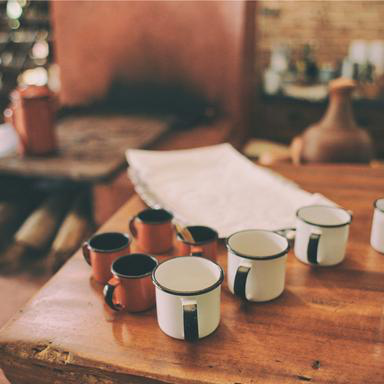

In [ ]:
import numpy as np

!wget https://picsum.photos/384 -O picsum.jpg
import PIL
img_origin = PIL.Image.open('picsum.jpg')

img_origin

In [ ]:
img = np.reshape(img_origin, (1, 384, 384, 3))
logits_my = model.predict( (np.array(img) / 128 - 1))

preds_sorted = logits_my.argsort()
preds_sorted = preds_sorted[0][:-5:-1]
for idx in preds_sorted:        
  print(f'{imagenet_labels[idx]}')  

/usr/local/lib/python3.6/dist-packages/tensorflow_addons/activations/gelu.py:81: UserWarning: Default value of `approximate` is changed from `True` to `False`
  "Default value of `approximate` is changed from `True` to `False`"


coffee_mug

cup

coffeepot

water_jug

